# Manifold Learning
* Author: Mahdieh Alizadeh

* Machine Learning_fall 2024

## Classical MDS

The objective function for classical MDS is given by:

$
\text{minimize} \quad c_1 := \sum_{i=1}^{n} \sum_{j=1}^{n} \left( x_i^T x_j - y_i^T y_j \right)^2
$

In matrix form:

$
\text{minimize} \quad c_1 = \| X^T X - Y^T Y \|_F^2
$

Where $ ( |\cdot\|_F)$  denotes the Frobenius norm.

The eigenvalue decomposition of the Gram matrix $( X^T X)$ is:

$
X^T X = V \Delta V^T, \quad Y^T Y = Q \Psi Q^T
$

The objective function can be simplified as:

$
\| X^T X - Y^T Y \|_F^2 = \text{tr} \left[ (\Delta - M \Psi M^T)^2 \right]
$

Where $( M = V^T Q )$.

To minimize the objective function, we differentiate with respect to $ ( M )$ and set to zero:

$
M \Psi M^T = \Delta
$

And similarly for $( \Psi )$:

$
M M^T = \Delta
$


For kernel classical MDS, the centering matrix $( H )$ and distance matrix $ ( D )$ are used:

$
H G H = - \frac{1}{2} H D H
$

The generalized classical MDS uses the kernel:

$
K = - \frac{1}{2} H D H
$

Eigenvalue decomposition of $( K )$ gives:

$
K = V \Delta V^T
$



In [1]:
from sklearn.datasets import load_digits, make_s_curve
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np

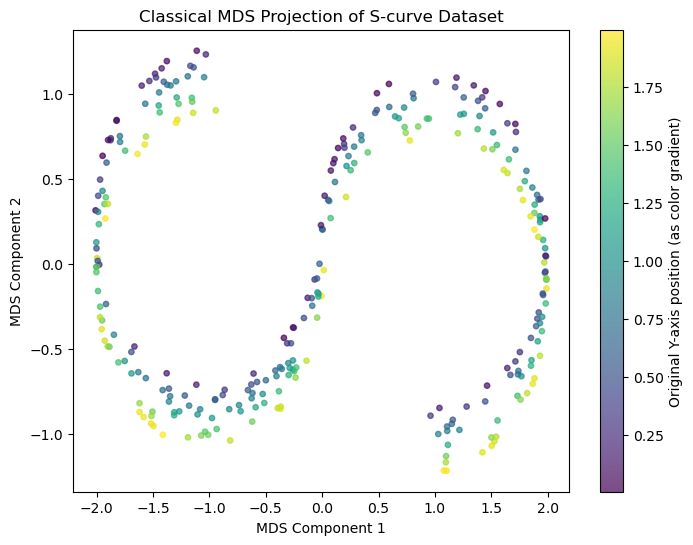

In [2]:
n_samples = 300
S_points, _ = make_s_curve(n_samples, random_state=0)
D = squareform(pdist(S_points, metric='euclidean'))
n = D.shape[0]
H = np.eye(n) - np.ones((n, n)) / n
D_squared = D ** 2
B = -0.5 * H @ D_squared @ H
eigenvalues, eigenvectors = np.linalg.eigh(B)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
m = 2
Lambda_m = np.diag(np.sqrt(eigenvalues[:m]))
Q_m = eigenvectors[:, :m]
X_transformed = Q_m @ Lambda_m
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=S_points[:, 1], cmap='viridis', s=15, alpha=0.7)
plt.colorbar(label="Original Y-axis position (as color gradient)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Classical MDS Projection of S-curve Dataset")
plt.show()

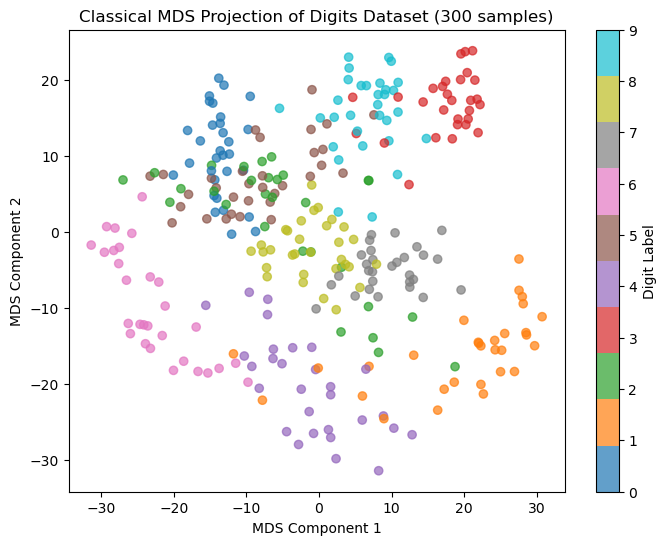

In [3]:
x, y = load_digits(return_X_y=True)

samples = 300
x_subset = x[:samples]
y_subset = y[:samples]

D = squareform(pdist(x_subset, metric='euclidean'))

n = D.shape[0]
H = np.eye(n) - np.ones((n, n)) / n

D_squared = D ** 2
B = -0.5 * H @ D_squared @ H

eigenvalues, eigenvectors = np.linalg.eigh(B)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

m = 2 
Lambda_m = np.diag(np.sqrt(eigenvalues[:m]))  
Q_m = eigenvectors[:, :m]

X_transformed = Q_m @ Lambda_m

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_subset, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Classical MDS Projection of Digits Dataset (300 samples)")
plt.show()